## Étape 1 : Implémentation de la méthode d'Euler

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def euler_sird(beta, gamma, mu, S0, I0, R0, D0, step, days):
    #number of steps
    steps = int(days / step)
    S, I, R, D = [S0], [I0], [R0], [D0]
    t = [0]
    
    for i in range(steps):
        dS = -beta * S[-1] * I[-1] * step
        dI = (beta * S[-1] * I[-1] - gamma * I[-1] - mu * I[-1]) * step
        dR = gamma * I[-1] * step
        dD = mu * I[-1] * step

        S.append(S[-1] + dS)
        I.append(I[-1] + dI)
        R.append(R[-1] + dR)
        D.append(D[-1] + dD)
        t.append(t[-1] + step)
    
    return t, S, I, R, D

#parametres
beta = 0.5
gamma = 0.15
mu = 0.015
S0, I0, R0, D0 = 0.99, 0.01, 0, 0
step = 0.01
days = 100


## Étape 2 : Simulation et analyse

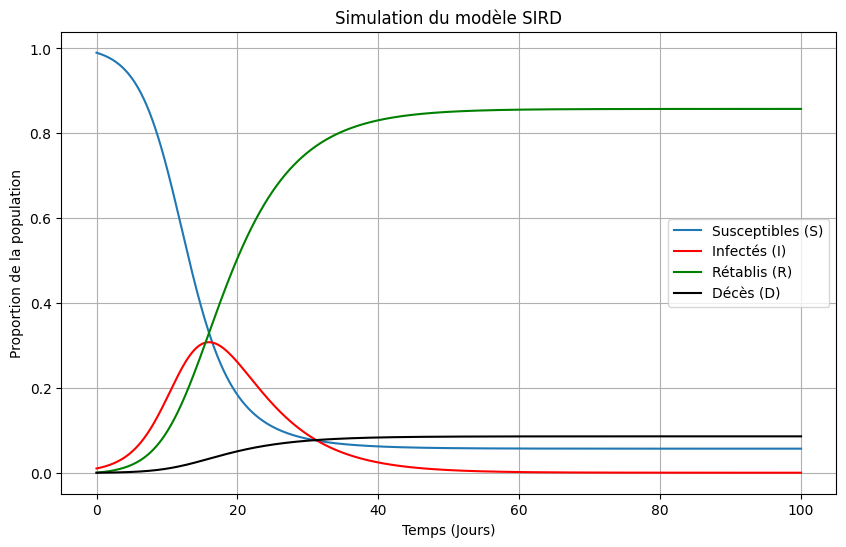

In [13]:
#simulation
t, S, I, R, D = euler_sird(beta, gamma, mu, S0, I0, R0, D0, step, days)

#plots
plt.figure(figsize=(10, 6))
plt.plot(t, S, label="Susceptibles (S)")
plt.plot(t, I, label="Infectés (I)", color='red')
plt.plot(t, R, label="Rétablis (R)", color='green')
plt.plot(t, D, label="Décès (D)", color='black')
plt.xlabel("Temps (Jours)")
plt.ylabel("Proportion de la population")
plt.title("Simulation du modèle SIRD")
plt.legend()
plt.grid()
plt.show()

## Etape 3: Ajustement des paramètres du modèle SIRD avec des données empiriques

Best parameters found:
Beta = 0.5
Gamma = 0.15
Mu = 0.005


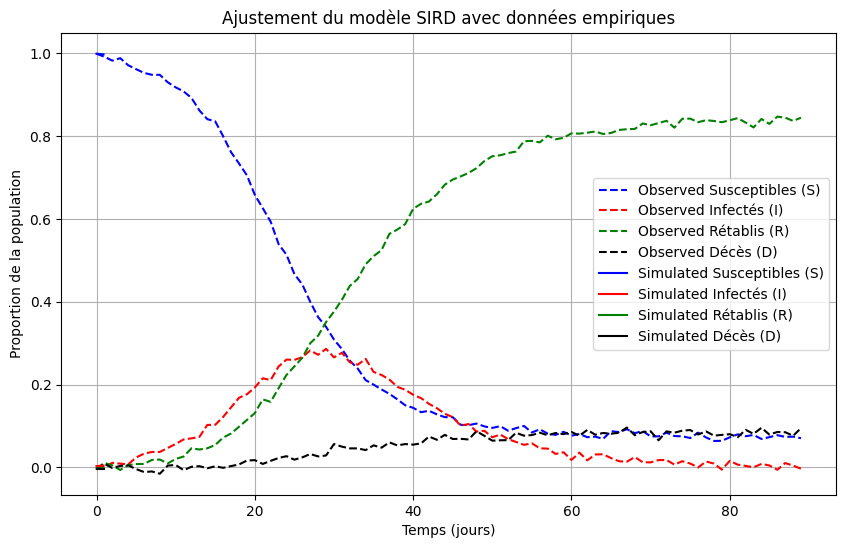

In [24]:
file_path = "/Users/sanae/Downloads/MD4_projects/SIRD_model/sird_dataset.csv"
data = pd.read_csv(file_path)

# Extract observed data
S_obs = data['Susceptibles']
I_obs = data['Infectés']
R_obs = data['Rétablis']
D_obs = data['Décès']
temps = data['Jour']

# function to calculate MSE
def calculate_error(S_sim, I_sim, R_sim, D_sim, S_obs, I_obs, R_obs, D_obs):
    error = 0
    for i in range(len(S_obs)):
        error += (S_obs[i] - S_sim[i])**2
        error += (I_obs[i] - I_sim[i])**2
        error += (R_obs[i] - R_sim[i])**2
        error += (D_obs[i] - D_sim[i])**2
    return error / len(S_obs)

# initial conditions from dataset
S0 = S_obs.iloc[0]
I0 = I_obs.iloc[0]
R0 = R_obs.iloc[0]
D0 = D_obs.iloc[0]

step = 0.01
days = len(temps) * step

# parameter ranges
beta_values = [0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
gamma_values = [0.08, 0.1, 0.12, 0.14, 0.15]
mu_values = [0.005, 0.008, 0.01, 0.012, 0.015]

# grid search
best_beta = None
best_gamma = None
best_mu = None
min_error = float('inf')

for beta in beta_values:
    for gamma in gamma_values:
        for mu in mu_values:
            # Simulate SIRD model with current parameters
            t, S_sim, I_sim, R_sim, D_sim = euler_sird(beta, gamma, mu, S0, I0, R0, D0, step, days)
            
            # Calculate error
            error = calculate_error(S_sim[:len(S_obs)], I_sim[:len(I_obs)], R_sim[:len(R_obs)], D_sim[:len(D_obs)], 
                                    S_obs, I_obs, R_obs, D_obs)
            if error < min_error:
                min_error = error
                best_beta = beta
                best_gamma = gamma
                best_mu = mu


# printing best parameters
print("Best parameters found:")
print("Beta =", best_beta)
print("Gamma =", best_gamma)
print("Mu =", best_mu)

# simulating with best parameters
t, S_sim, I_sim, R_sim, D_sim = euler_sird(best_beta, best_gamma, best_mu, S0, I0, R0, D0, step, days)

# plot observed vs simulated data
plt.figure(figsize=(10, 6))
plt.plot(temps, S_obs, 'b--', label="Observed Susceptibles (S)")
plt.plot(temps, I_obs, 'r--', label="Observed Infectés (I)")
plt.plot(temps, R_obs, 'g--', label="Observed Rétablis (R)")
plt.plot(temps, D_obs, 'k--', label="Observed Décès (D)")

plt.plot(t[:len(S_obs)], S_sim[:len(S_obs)], 'b', label="Simulated Susceptibles (S)")
plt.plot(t[:len(I_obs)], I_sim[:len(I_obs)], 'r', label="Simulated Infectés (I)")
plt.plot(t[:len(R_obs)], R_sim[:len(R_obs)], 'g', label="Simulated Rétablis (R)")
plt.plot(t[:len(D_obs)], D_sim[:len(D_obs)], 'k', label="Simulated Décès (D)")

plt.xlabel("Temps (jours)")
plt.ylabel("Proportion de la population")
plt.title("Ajustement du modèle SIRD avec données empiriques")
plt.legend()
plt.grid()
plt.show()
